<a href="https://colab.research.google.com/github/Shruti12377/airbnb-clone/blob/master/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('sample_data/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Selecting relevant features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


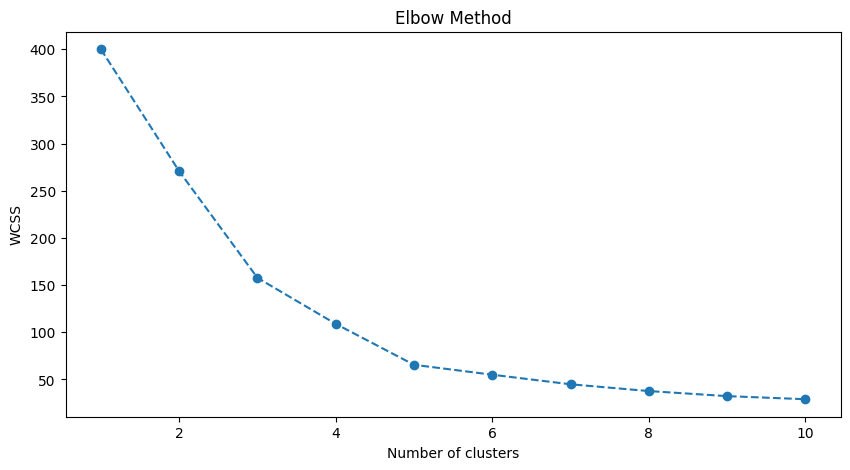

In [ ]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Assuming the optimal number of clusters is 5 from the elbow method
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters


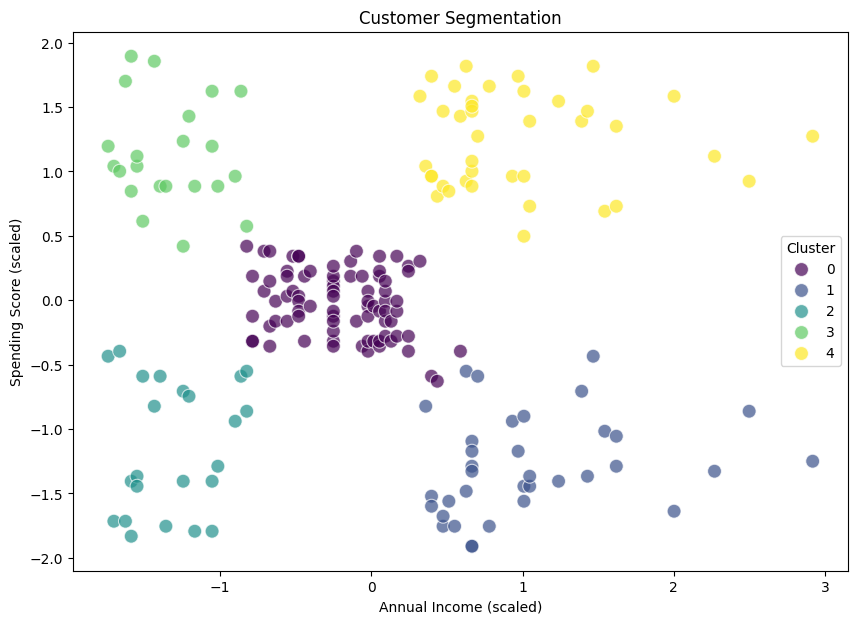

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

print(cluster_analysis)



         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        164.371429  41.114286           88.200000               17.114286   
2         23.000000  45.217391           26.304348               20.913043   
3         23.090909  25.272727           25.727273               79.363636   
4        162.000000  32.692308           86.538462               82.128205   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  
